# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')

In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.head()

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].copy()
df

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geography        10000 non-null  object 
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


## Preprocessing

In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first = True)
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [ ]:
X.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,1,101348.88,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,1,0
2,42,8,159660.80,3,1,0,113931.57,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [ ]:
#Ini digunakan jika dilakukan scaler/Normalisas. Jika tidak, code ini bisa dilewat dan diganti dengan code yang ada di dalam komen
X_transform = pd.DataFrame(X_transform, columns = X.columns)
#X_transform = X.copy()

## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.25,random_state = 123)

# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
params = {"tol": [0.1,0.01,0.001], "C":[0.5,1.0,1.5,2.0]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator= model1,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid.fit(X_train,y_train)
grid.best_params_

{'C': 0.5, 'tol': 0.01}

In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1983
           1       0.66      0.20      0.31       517

    accuracy                           0.81      2500
   macro avg       0.74      0.59      0.60      2500
weighted avg       0.79      0.81      0.77      2500


[[1929   54]
 [ 413  104]]

0.8132


## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier(n_neighbors=1)
Knn_model.fit(X_train, y_train)
#END CODE

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = Knn_model.predict(X_test)

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = Knn_model.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1983
           1       0.51      0.45      0.48       517

    accuracy                           0.80      2500
   macro avg       0.69      0.67      0.68      2500
weighted avg       0.79      0.80      0.79      2500


[[1760  223]
 [ 284  233]]

0.7972


## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=42)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
#END CODE


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model3.predict(X_test)

print(classification_report(y_test,y_pred))
print("")
print(confusion_matrix(y_test,y_pred))
print("")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1983
           1       0.75      0.47      0.58       517

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500


[[1901   82]
 [ 273  244]]

0.858


## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

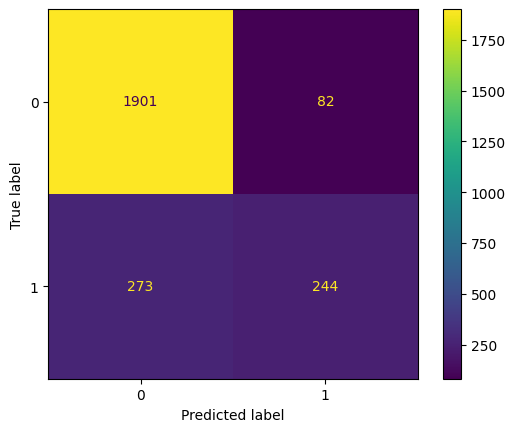

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

model 1
precision : 0.83
recall : 0.97
accuracy :0.81
model 2
precision : 0.86
recall : 0.89
accuracy :0.80
model 3
precision : 0.87
recall : 0.96
accuracy :0.86
kesimpulannya adalah model terbaik yang digunakan adalah model 2